find the data description here: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

Based on the proposed research question, the target variable will be [leave] which represents how easy it is to take a leave for mental health reasons in a tech company.

In [67]:
import pandas as pd

df = pd.read_csv('data/survey.csv')

print(df.head())
print(df.shape)

             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1 

In [68]:
df['Country'].describe()

count              1259
unique               48
top       United States
freq                751
Name: Country, dtype: object

In [69]:
df['tech_company'].describe()

count     1259
unique       2
top        Yes
freq      1031
Name: tech_company, dtype: object

In [70]:
#drop non-tech company answers:
print("Before Dropping: ", df.shape)
df = df[df['tech_company'] != 'No']
print("After Dropping: ", df.shape)

Before Dropping:  (1259, 27)
After Dropping:  (1031, 27)


In [71]:
#Type of each col
for col_name, dtype in df.dtypes.to_dict().items():
    print(col_name + ": " + str(dtype))

Timestamp: object
Age: int64
Gender: object
Country: object
state: object
self_employed: object
family_history: object
treatment: object
work_interfere: object
no_employees: object
remote_work: object
tech_company: object
benefits: object
care_options: object
wellness_program: object
seek_help: object
anonymity: object
leave: object
mental_health_consequence: object
phys_health_consequence: object
coworkers: object
supervisor: object
mental_health_interview: object
phys_health_interview: object
mental_vs_physical: object
obs_consequence: object
comments: object


Note that age is the only continuous variable in this data set

In [72]:
#target variable
df['leave'].describe()

count           1031
unique             5
top       Don't know
freq             456
Name: leave, dtype: object

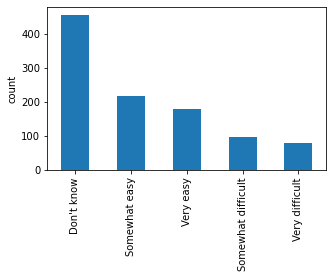

In [73]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

#bar graph for target variable
plt.figure(figsize=(5,3))
pd.value_counts(df['leave']).plot.bar()
plt.ylabel('count')
plt.show()

For people who answered Don't know, what are the correlation between their answer and their take on if discussing a mental health issue with employer would have negative consequences.

In [74]:
dont_know = df[df['leave']=='Don\'t know']
dont_know['mental_health_consequence'].describe()

count       456
unique        3
top       Maybe
freq        208
Name: mental_health_consequence, dtype: object

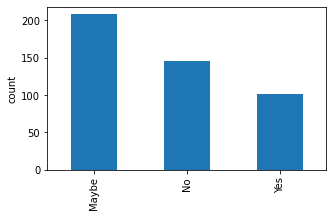

In [75]:
#distribution of take on mental_health_concequence for people answered don't know to if taking a leave is easy
plt.figure(figsize=(5,3))
pd.value_counts(dont_know['mental_health_consequence']).plot.bar()
plt.ylabel('count')
plt.show()

mental_health_consequence     Maybe        No       Yes
leave                                                  
Don't know                 0.456140  0.320175  0.223684
Somewhat difficult         0.275510  0.316327  0.408163
Somewhat easy              0.378995  0.525114  0.095890
Very difficult             0.265823  0.113924  0.620253
Very easy                  0.206704  0.720670  0.072626


<Figure size 360x216 with 0 Axes>

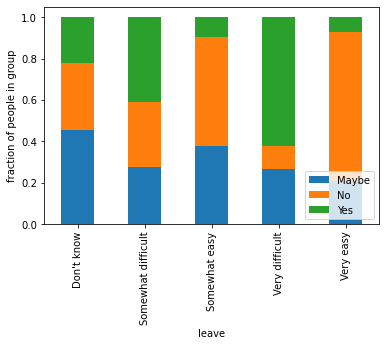

In [76]:
#correlation between mental_health_consequence and leave
count_matrix = df.groupby(['leave', 'mental_health_consequence']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

count    1029.000000
mean       31.776482
std         7.325439
min        -1.000000
25%        27.000000
50%        31.000000
75%        35.000000
max        62.000000
Name: Age, dtype: float64


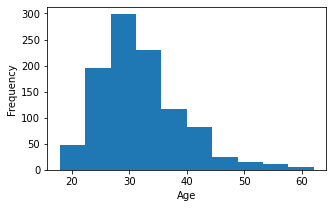

In [79]:
#distribution of age in the survey population
print(df['Age'].describe())

#drop wrong values
df = df[df['Age'] < 90]
df = df[df['Age'] > 15]

#check if the wrong age is droped
#print(df['Age'].describe())

plt.figure(figsize = (5,3))
df['Age'].plot.hist(bins = 10) 
plt.xlabel('Age')

plt.show()

<Figure size 360x216 with 0 Axes>

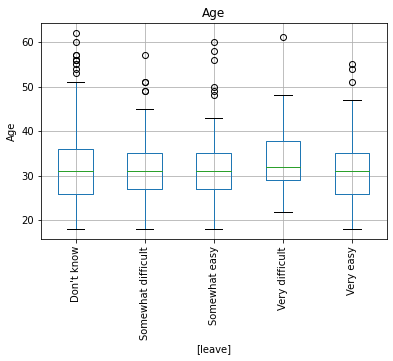

In [80]:
#correlation between age and leave
plt.figure(figsize = (5,3))
df[['Age','leave']].boxplot(by='leave')
plt.ylabel('Age')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

anonymity           Don't know        No       Yes
leave                                             
Don't know            0.819780  0.015385  0.164835
Somewhat difficult    0.581633  0.153061  0.265306
Somewhat easy         0.577982  0.018349  0.403670
Very difficult        0.564103  0.205128  0.230769
Very easy             0.465909  0.034091  0.500000


<Figure size 360x216 with 0 Axes>

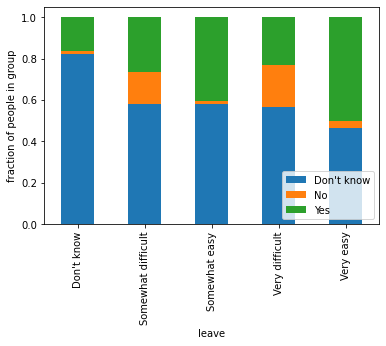

In [81]:
#correlation between anonymity and leave
count_matrix = df.groupby(['leave', 'anonymity']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [82]:
#gender describe
df['Gender'].describe()

count     1025
unique      39
top       Male
freq       510
Name: Gender, dtype: object

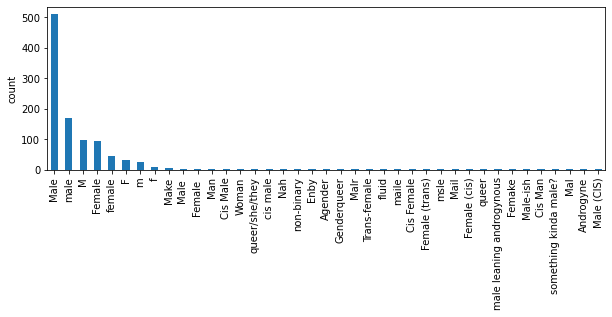

In [83]:
#gender bar plot
plt.figure(figsize=(10,3))
pd.value_counts(df['Gender']).plot.bar()
plt.ylabel('count')
plt.show()

Due to the sensitivity in gender, I'm not going to preprocess gender feautre for now

obs_consequence           No       Yes
leave                                 
Don't know          0.898901  0.101099
Somewhat difficult  0.673469  0.326531
Somewhat easy       0.903670  0.096330
Very difficult      0.679487  0.320513
Very easy           0.926136  0.073864


<Figure size 360x216 with 0 Axes>

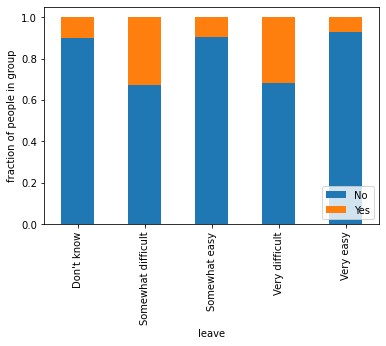

In [84]:
#obs_consequence and leave correlation
count_matrix = df.groupby(['leave', 'obs_consequence']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

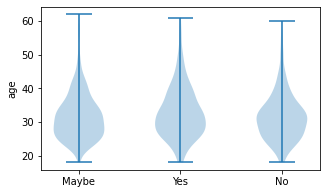

In [85]:
#correlation between age and mental_health_consequence
plt.figure(figsize = (5,3))

dataset = [df[df['mental_health_consequence']=='Maybe']['Age'].values,
           df[df['mental_health_consequence']=='Yes']['Age'].values,
          df[df['mental_health_consequence' ]=='No']['Age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['Maybe','Yes','No'])
plt.ylabel('age')
plt.show()

phys_health_consequence       Maybe        No       Yes
mental_health_consequence                              
Maybe                      0.321429  0.670168  0.008403
No                         0.016427  0.983573       NaN
Yes                        0.388889  0.423611  0.187500


<Figure size 360x216 with 0 Axes>

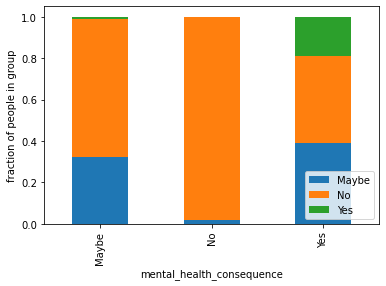

In [24]:
#phys_health_consequence and meantal_health_consequence correlation
count_matrix = df.groupby(['mental_health_consequence', 'phys_health_consequence']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

plt.figure(figsize=(5,3))
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

In [86]:
#balance of leave
df['leave'].value_counts()

Don't know            455
Somewhat easy         218
Very easy             176
Somewhat difficult     98
Very difficult         78
Name: leave, dtype: int64

In [87]:
#balance of mental_health_consequence
df['mental_health_consequence'].value_counts()

No       428
Maybe    375
Yes      222
Name: mental_health_consequence, dtype: int64

In [89]:
#splitting the data: no group, but imbalance, iid --stratifiedKfold and shuffle
#In reality, if we take into consideration company, which makes group, the data will not be iid.
#However, we do not know how the survey is distributed, and since the company is not specified, 
#I am going to assume the data is iid
#dropping comments, timestamp as it has no effect on the model

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

y = df['leave']
X = df.drop(columns= ['leave', 'comments', 'Timestamp', 'tech_company'])
random_state = 37

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)
print('test balance:',np.unique(y_test,return_counts=True))

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]
    print('training set:',X_train.shape, y_train.shape) 
    print('validation set:',X_val.shape, y_val.shape) 
    print('test set: ', X_test.shape, y_test.shape)
    
print('\n')
#check reproducibility
print(X_train.head(1))
print(X_val.head(1))
print(X_test.head(1))

test balance: (array(["Don't know", 'Somewhat difficult', 'Somewhat easy',
       'Very difficult', 'Very easy'], dtype=object), array([91, 19, 44, 16, 35]))
training set: (615, 23) (615,)
validation set: (205, 23) (205,)
test set:  (205, 23) (205,)
training set: (615, 23) (615,)
validation set: (205, 23) (205,)
test set:  (205, 23) (205,)
training set: (615, 23) (615,)
validation set: (205, 23) (205,)
test set:  (205, 23) (205,)
training set: (615, 23) (615,)
validation set: (205, 23) (205,)
test set:  (205, 23) (205,)


      Age Gender Country state self_employed family_history treatment  \
1167   34   male  Poland   NaN            No             No        No   

     work_interfere    no_employees remote_work  ... seek_help   anonymity  \
1167          Never  More than 1000         Yes  ...        No  Don't know   

     mental_health_consequence phys_health_consequence     coworkers  \
1167                     Maybe                      No  Some of them   

        supervisor ment

In [94]:
#preprocess the splitted data
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler

#age is tailed, so use standard instead of minmax
std_ftrs = ['Age']
onehot_ftrs = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', \
               'work_interfere', 'no_employees', 'remote_work', 'benefits', 'care_options', \
               'wellness_program', 'seek_help', 'anonymity','mental_health_consequence', \
               'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', \
               'phys_health_interview', 'mental_vs_physical', 'obs_consequence']

preprocessor = ColumnTransformer(transformers=[
    ('std', StandardScaler(), std_ftrs),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)

(615, 23)
(615, 170)
[[ 0.30912805  0.          0.         ...  0.          1.
   0.        ]
 [-0.5427633   0.          0.         ...  1.          1.
   0.        ]
 [ 0.45110994  0.          0.         ...  0.          1.
   0.        ]
 ...
 [-0.25879951  0.          0.         ...  0.          1.
   0.        ]
 [ 0.59309184  0.          0.         ...  0.          1.
   0.        ]
 [ 0.45110994  0.          0.         ...  0.          1.
   0.        ]]
